<a href="https://colab.research.google.com/github/lauBit/proyecto-dos/blob/main/Evaluaci%C3%B3n_de_Calidad_de_Carros_Decision_Tree_Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil

Integrantes del Grupo:
- Paola Romero
- Fernando Montaño
- Laura Camelo
- Daniel Garcia

## **Explicación breve del problema**.
Se desea realizar un modelo de nivel de evaluación de vehiculos basado en caracteristicas tales como: precio de compra, precio de mantenimiento, número de puertas, cupo de personas, tamaño del maletero, seguridad estimada del vehiculo.

## Importación de Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

!pip install ucimlrepo

## Importación del Dataset "Car Evaluation"
El dataset se importa a través del paquete "ucimlrepo" y la librería "fetch_ucirepo" el cual se conecta directamente a la página web donde se encuentra alojado el dataset.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

## Identificación de Variables y Registros
Se identifican 6 variables caracteristicas las cuales cuentan con un total de 1728 registros cada una. A continuación se relaciona el detalle de las variables mencionadas:
- `buying`: Precio de compra.
- `maint`: Precio del mantenimiento.
- `doors`: Número de puertas.
- `persons`: Cupo de personas.
- `lug_boot`: Tamaño del maletero.
- `safety`: Seguridad estimada del vehiculo.

Adicionalmente, se identifica que una variable objetivo llamada `class`, la cual cuenta con un total de 1728 registros al igual que lo identificado en las variables anteriores.



In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB
None


In [ ]:
print(X.describe())

       buying  maint doors persons lug_boot safety
count    1728   1728  1728    1728     1728   1728
unique      4      4     4       3        3      3
top     vhigh  vhigh     2       2    small    low
freq      432    432   432     576      576    576


In [ ]:
#Se agrupan los valores
print(X.groupby('buying').size())
print(X.groupby('maint').size())
print(X.groupby('doors').size())
print(X.groupby('persons').size())
print(X.groupby('lug_boot').size())
print(X.groupby('safety').size())

buying
high     432
low      432
med      432
vhigh    432
dtype: int64
maint
high     432
low      432
med      432
vhigh    432
dtype: int64
doors
2        432
3        432
4        432
5more    432
dtype: int64
persons
2       576
4       576
more    576
dtype: int64
lug_boot
big      576
med      576
small    576
dtype: int64
safety
high    576
low     576
med     576
dtype: int64


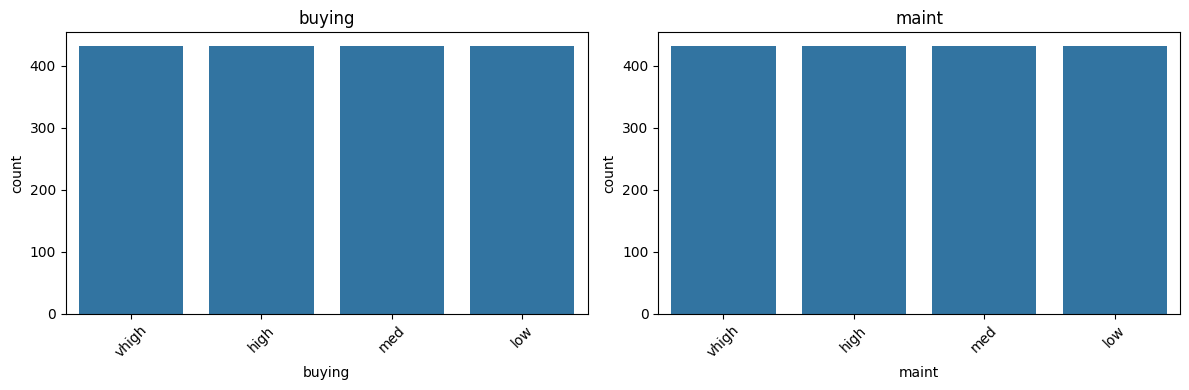

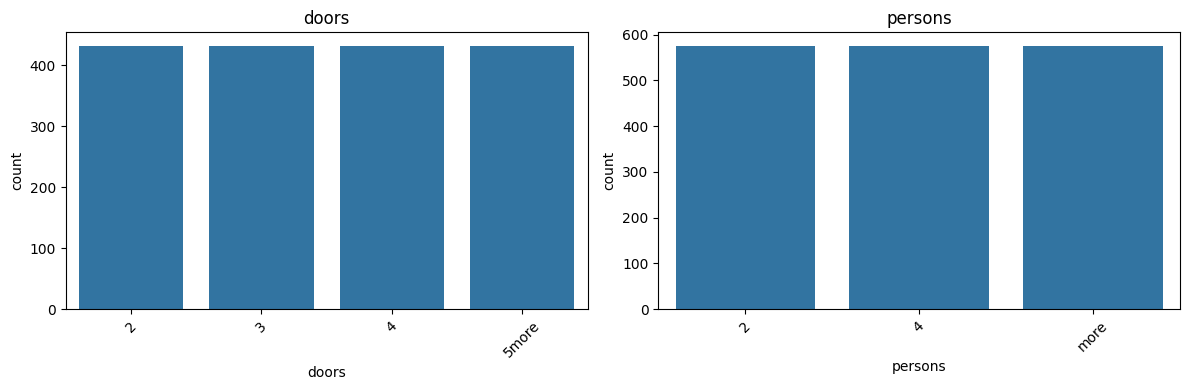

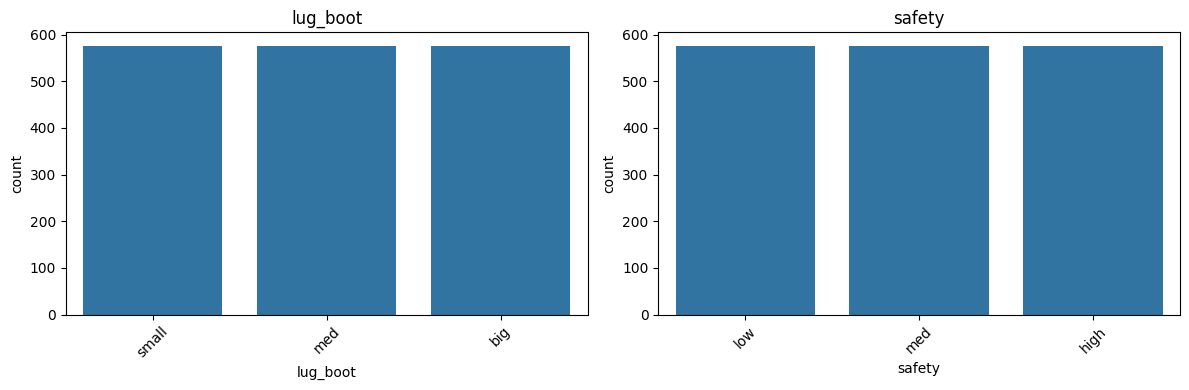

In [ ]:
#Gráfico de las variables
for i in range(0, len(X.columns), 2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    for j, columna in enumerate(X.columns[i:i+2]):
        sns.countplot(x=columna, data=X, ax=axs[j])
        axs[j].set_title(columna)
        axs[j].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB
None


In [ ]:
print(y.describe())

        class
count    1728
unique      4
top     unacc
freq     1210


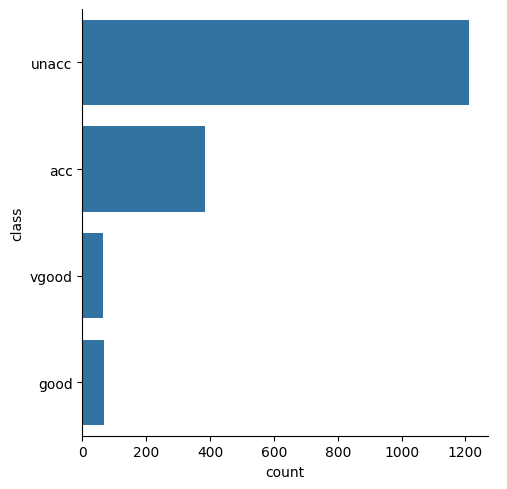

In [ ]:
sns.catplot(y='class', data=y, kind="count")

Una vez validada la información de las variables del dataset, no se identifican datos atipicos asi como valores nulos, por lo cual no se realizara ajustes sobre la data.

## Estandarización de las Variables a Numéricas

In [ ]:
X['buyingAjustado'] = X['buying'].map({'vhigh': 3, 'high':2, 'med':1, 'low':0}).astype(int)
X['maintAjustado'] = X['maint'].map({'vhigh': 3, 'high':2, 'med':1, 'low':0}).astype(int)
X['doorsAjustado'] = X['doors'].map({'5more': 3, '4':2, '3':1, '2':0}).astype(int)
X['personsAjustado'] = X['persons'].map({'more': 2, '4':1, '2':0}).astype(int)
X['lug_bootAjustado'] = X['lug_boot'].map({'big': 2, 'med':1, 'small':0}).astype(int)
X['safetyAjustado'] = X['safety'].map({'low': 0, 'med': 1, 'high': 2}).astype(int)

## Implementación del Modelo "Decision Tree"

### Partición de la data en conjuntos de entrenamiento y pruebas

In [ ]:
X_ajustado = X.drop(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ajustado, y, test_size=0.2, stratify=y, random_state=1)

### Entrenamiento del Modelo

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Predicción del Modelo

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9855491329479769

Se obtiene una exactitud del modelo del 98% realizando un mejoramiento del modelo a través del uso del criterio 'gini', el cual obtiene un mejor resultado que al utilizar el modelo normal del árbol de decisión.